# SVM Lab

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [2]:
# Step 1: Load the dataset (replace with the path to your dataset)
# The dataset should have two columns: 'label' (spam/ham) and 'message' (text)
url = "https://aet-cs.github.io/white/ML/data/Fake_News.csv"
path = "data/Fake_News.csv"
data = pd.read_csv(path, sep=',')

In [3]:
data = data.dropna()

## EDA

Do some basic EDA here. How balanced is the data set? Data types? Etc.

In [4]:
data

,label,title,text,subject,date
0,Fake,"BREAKING: Cop Finally Gets His Due, Walter Sc...","In America, we have been having a conversation...",News,"December 7, 2017"
1,Fake,Watch: Trump Supporting Coal CEO Upset Trump ...,"While on the campaign trail, Donald Trump prom...",News,"December 6, 2017"
2,Fake,Americans Once Elected A President After He W...,After an awful campaign filled with hateful rh...,News,"November 29, 2017"
3,Fake,Trumpsters Launch Insane Conspiracy Theory Ab...,Senator John McCain (R-AZ) was treated at Walt...,News,"November 23, 2017"
4,Fake,This Old Mike Pence Tweet Sure Is Uncomfortab...,GOP candidate Roy Moore is accused of sexually...,News,"November 10, 2017"
...,...,...,...,...,...
4497,True,Poland will not change its stance on EU's post...,WARSAW (Reuters) - Poland will not change its ...,worldnews,"August 24, 2017"
4498,True,'Safer than London!' North Korea opens door to...,MOSCOW (Reuters) - North Korea has opened its ...,worldnews,"August 24, 2017"
4499,True,Barcelona balances security and freedom after ...,MADRID (Reuters) - Spain s northeastern region...,worldnews,"August 23, 2017"
4500,True,Vietnam calls for Southeast Asian unity amid S...,HANOI (Reuters) - Vietnam s most powerful lead...,worldnews,"August 24, 2017"


In [5]:
data.describe()

,label,title,text,subject,date
count,4495,4495,4495,4495,4495
unique,2,4429,4357,8,1762
top,Fake,Boiler Room EP #120 – Scorched Earth Media: Fr...,,politicsNews,"December 21, 2017"
freq,2362,2,83,1149,23


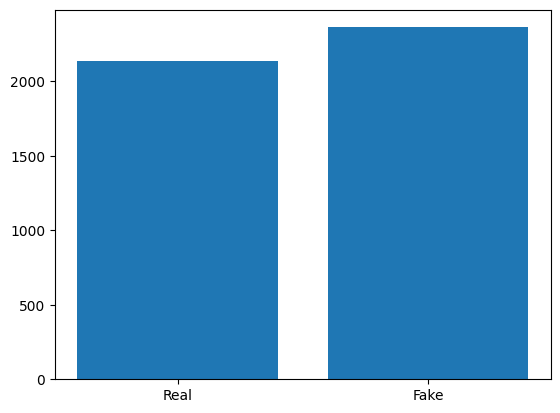

True fraction: 0.475 
Fake fraction: 0.525


In [6]:
real = data[data['label'] == 'True']
fake = data[data['label'] == 'Fake']

plt.bar(['Real', 'Fake'], [len(real), len(fake)])
plt.show()
print(f"True fraction: {len(real) / (len(data)):.3f} \nFake fraction: {len(fake) / (len(data)):.3f}")

The data is roughly balanced between true and fake news, but it could be better.

We will ordinal encode the target column

In [7]:
# Encode labels using OrdinalEncoder into 0,1 (dont' change)
encoder = OrdinalEncoder()
data['label'] = encoder.fit_transform(data[['label']])

In [8]:
# Print the mapping from labels to numerical values (dont' change)
label_mapping = {category: idx for idx, category in enumerate(encoder.categories_[0])}
print("Label Encoding:")
for label, value in label_mapping.items():
    print(f"'{label}' -> {value}")

Label Encoding:
'Fake' -> 0
'True' -> 1


Define X and y to the be title and label

In [9]:
# define the data
X = data['title']
y = data['label']

In [10]:
# Step 2: Split the dataset into training and testing sets
# Make a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 3: Text encoding using TF-IDF
# Don't change
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [12]:
# Step 4: Train the SVM

model = SVC(kernel='linear', C=1.0)
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)

### Print Results

In [13]:
# Find misclassified examples
y_pred = np.array(y_pred)
y_test = np.array(y_test)
misclassified_indices = (y_pred != y_test).nonzero()[0]  # Indices where predictions differ from true labels

# Print the first few misclassified examples
print("\nMisclassified Examples:")
for idx in misclassified_indices[10:20]:  # Limit to 5 examples
    print(f"Message: {X_test.iloc[idx]}")
    print(f"True Label: {encoder.inverse_transform([[y_test[idx]]])[0][0]}")
    print(f"Predicted Label: {encoder.inverse_transform([[y_pred[idx]]])[0][0]}")
    print("-" * 50)

print("\nAccuracy:", accuracy_score(y_test, y_pred))


Misclassified Examples:
Message: Trump adds nuance to pro-Israel approach ahead of Netanyahu visit
True Label: True
Predicted Label: Fake
--------------------------------------------------
Message: Italian man sentenced to 24 years for infecting dozens of women with HIV
True Label: True
Predicted Label: Fake
--------------------------------------------------
Message: ALARMING: NSA Refuses to Release Clinton-Lynch Tarmac Transcript with Lame Excuse
True Label: Fake
Predicted Label: True
--------------------------------------------------
Message:  Anti-Abortion Laws Collapse In Major Defeat For The Right
True Label: Fake
Predicted Label: True
--------------------------------------------------
Message: Shaquille O’Neal: “The Earth is flat. Yes, it is.”
True Label: Fake
Predicted Label: True
--------------------------------------------------
Message: THE LIST OF WHO’S WHO TAKING ADVANTAGE OF FAILED EU AUSTERITY EXPERIMENT IN GREECE
True Label: Fake
Predicted Label: True
------------------

### Confusion Matrix

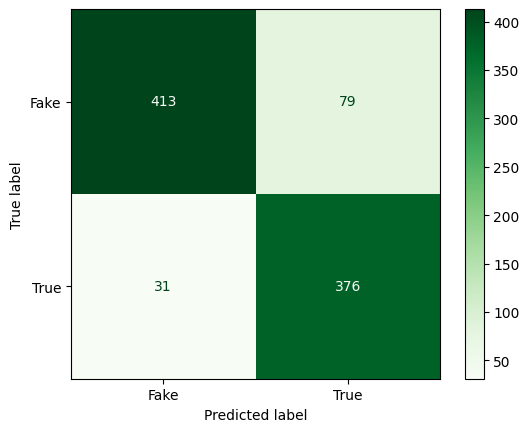

In [14]:
# print/draw a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap='Greens')
plt.show()

## TF-IDF

Redo the above analysis with a TF-IDF encoding instead of a Counter (Bag of Words)

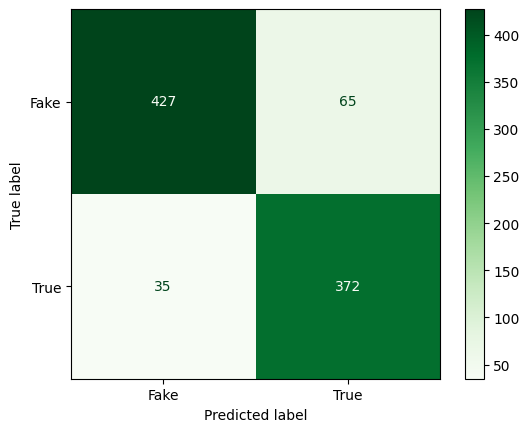


Accuracy: 0.8887652947719689


In [15]:
vectorizer = TfidfVectorizer(stop_words='english', max_features = 1000)

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

model = SVC(kernel='linear', C=1.0)
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap='Greens')
plt.show()

print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Optimize

There are lots of parameters to SVM/SVC. Try them out and see how good you can do!

In [ ]:
def score(data, model : SVC):
    X = data['title']
    y = data['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features = 1000)

    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)

    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    
    return accuracy_score(y_test, y_pred)